<a href="https://colab.research.google.com/github/bot9066/UBER-Supply-demand/blob/main/UBER_RIDE_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -UBER RIDE PROBLEM



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -** - Kailash Patidar


# **Project Summary -**

We performed Exploratory Data Analysis (EDA) on the cleaned Uber ride request dataset to better understand how Uber’s ride system works and where problems might be happening. The goal was to explore the data, find patterns, and identify issues like high demand, lack of available drivers, and frequent ride cancellations.

We used Python libraries like Pandas (for handling the data), Matplotlib, and Seaborn (for creating charts and graphs). These tools helped us break down the data in simple ways so we could see when and where ride requests were made, how many were successful, and what caused failures.

The EDA allowed us to:

Understand how many rides were requested at different times of the day.

See which pickup points (City or Airport) had more issues.

Identify peak hours where demand was very high.

Discover when and why rides got cancelled or had no cars available.

Spot times when users were most frustrated because their ride requests failed.

This phase helped us uncover all the important trends and prepare for further analysis using SQL and Excel dashboards. Each visual chart gave us a clearer picture of Uber’s day-to-day ride request patterns and the key areas needing improvement.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The Uber ride-hailing service frequently faces operational challenges, especially during peak demand periods, leading to ride cancellations, unavailability of cars, and increased customer dissatisfaction. The company lacks a clear understanding of when, where, and why these service failures occur.

This project aims to analyze Uber’s ride request data using Exploratory Data Analysis (EDA), SQL queries, and Excel dashboards to:

Identify patterns in ride demand across different hours of the day and locations.

Detect mismatches between rider demand and driver availability.

Understand the root causes behind trip cancellations and 'No Cars Available' issues.

Provide data-driven insights and visualizations that can help Uber optimize resource allocation, improve service reliability, and enhance customer satisfaction.

The insights derived from this project will support operational decision-making and inform strategies for better fleet management, driver distribution, and customer experience enhancement.



#### **Define Your Business Objective?**

The primary business objective of this project is to enhance Uber’s operational efficiency and customer satisfaction by leveraging historical ride request data. Through a detailed analysis of ride patterns, cancellation reasons, and demand-supply dynamics, the goal is to:

Minimize ride cancellations and "No Cars Available" scenarios by identifying problem areas in time and location.

Optimize driver allocation and availability during peak hours and high-demand zones.

Improve customer experience by ensuring faster, more reliable ride fulfillment.

Support data-driven decision-making for strategic planning in driver deployment, resource management, and service improvements.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn styling
sns.set(style='whitegrid')
print("✅ Libraries imported successfully.")

✅ Libraries imported successfully.


### Dataset Loading

In [45]:
# Load Dataset
try:
    Uber_Data_Cleaned_df = pd.read_csv("https://raw.githubusercontent.com/bot9066/UBER-Supply-demand/main/Uber_Data_Cleaned.csv")
    print(f" Data loaded successfully.\nTitles shape: {Uber_Data_Cleaned_df.shape}")
except Exception as e:
    print(" Error loading datasets:", e)


 Data loaded successfully.
Titles shape: (6745, 8)


### Dataset First View

In [46]:
# First View of Datasets
print(" Uber_Data_Cleaned Dataset:")
display(Uber_Data_Cleaned_df.head())

 Uber_Data_Cleaned Dataset:


,Request id,Pickup point,Driver id,Status,Request Date,Request Time,Drop Date,Drop Time
0,619,Airport,1.0,Trip Completed,2016-07-11,11:51:00,2016-07-11,13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11,17:57:00,2016-07-11,18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12,09:17:00,2016-07-12,09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12,21:08:00,2016-07-12,22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13,08:33:16,2016-07-13,09:25:47


### Dataset Rows & Columns count

In [47]:
# Dataset Rows & Columns count
print("Rows:", Uber_Data_Cleaned_df.shape[0])
print("Columns:", Uber_Data_Cleaned_df.shape[1])


Rows: 6745
Columns: 8


### Dataset Information

In [48]:
# Dataset Info
Uber_Data_Cleaned_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Request id    6745 non-null   int64  
 1   Pickup point  6745 non-null   object 
 2   Driver id     4095 non-null   float64
 3   Status        6745 non-null   object 
 4   Request Date  6745 non-null   object 
 5   Request Time  6745 non-null   object 
 6   Drop Date     2831 non-null   object 
 7   Drop Time     2831 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 421.7+ KB


#### Duplicate Values

In [49]:
# Dataset Duplicate Value Count
print("Duplicate Rows:", Uber_Data_Cleaned_df.duplicated().sum())


Duplicate Rows: 0


#### Missing Values/Null Values

In [50]:
# Missing Values/Null Values Count
print("Missing Values:\n", Uber_Data_Cleaned_df.isnull().sum())


Missing Values:
 Request id         0
Pickup point       0
Driver id       2650
Status             0
Request Date       0
Request Time       0
Drop Date       3914
Drop Time       3914
dtype: int64


### What did you know about your dataset?

###It contains Uber ride requests with details like pickup point, request/drop time, and status.

###Some missing drop times, especially for cancellations.

###Multiple trip statuses: Completed, Cancelled, No Cars Available.



## ***2. Understanding Your Variables***

In [51]:
# Dataset Columns
print(Uber_Data_Cleaned_df.columns)
Uber_Data_Cleaned_df.describe(include='all')
Uber_Data_Cleaned_df.nunique()


Index(['Request id', 'Pickup point', 'Driver id', 'Status', 'Request Date',
       'Request Time', 'Drop Date', 'Drop Time'],
      dtype='object')


,0
Request id,6745
Pickup point,2
Driver id,300
Status,3
Request Date,5
Request Time,4955
Drop Date,6
Drop Time,2393


### Variables Description

### *The dataset comprises several variables that capture details about Uber ride requests and their outcomes. Each row in the dataset represents a single ride request, and the associated columns provide structured insights into various aspects of that request.*

Request_id is a unique identifier assigned to every ride request in the system. This ID helps to distinguish each entry and is useful for reference and filtering purposes.

Pickup_Point indicates the location from where the ride was requested. The values are categorical and limited to either 'City' or 'Airport', which represent the two primary pickup hubs for Uber in the dataset. This variable helps analyze demand patterns and service issues across these zones.

Status reflects the outcome of each request. It has three possible values: 'Trip Completed', 'Cancelled', and 'No Cars Available'. This field is crucial in understanding user satisfaction, driver availability, and operational gaps.

Request_Time is a timestamp that records the exact date and time when a customer made the ride request. This field was originally stored in a mixed date-time format and has been cleaned and converted into a proper datetime object for analysis.

Drop_Time records the timestamp of when the trip ended. For requests that were either cancelled or not fulfilled due to lack of available cars, this field is left blank (NaN). This column helps us measure the time duration of completed rides and evaluate efficiency.

Request_Hour is a derived variable extracted from the Request_Time. It captures only the hour (0–23) during which the request was made. This feature allows for hourly demand analysis and identification of peak traffic hours.

Request_Date is another derived variable from Request_Time that isolates the calendar date. It allows for trend analysis across different days and helps detect any daily or weekday-specific patterns.

Together, these variables allow us to explore not only the operational performance of Uber over time but also uncover problems related to supply-demand imbalance, cancellation behavior, and customer service quality.



### Check Unique Values for each variable.

In [52]:
# Check Unique Values for each variable.
# Show number of unique values per column
print("🔎 Unique values per variable:\n")
print(Uber_Data_Cleaned_df.nunique())

# Optionally: show unique values themselves for categorical variables
for col in Uber_Data_Cleaned_df.columns:
    if Uber_Data_Cleaned_df[col].dtype == 'object':
        print(f"\nUnique values in '{col}':")
        print(Uber_Data_Cleaned_df[col].unique())


🔎 Unique values per variable:

Request id      6745
Pickup point       2
Driver id        300
Status             3
Request Date       5
Request Time    4955
Drop Date          6
Drop Time       2393
dtype: int64

Unique values in 'Pickup point':
['Airport' 'City']

Unique values in 'Status':
['Trip Completed' 'Cancelled' 'No Cars Available']

Unique values in 'Request Date':
['2016-07-11' '2016-07-12' '2016-07-13' '2016-07-14' '2016-07-15']

Unique values in 'Request Time':
['11:51:00' '17:57:00' '09:17:00' ... '23:50:05' '23:54:39' '23:55:03']

Unique values in 'Drop Date':
['2016-07-11' '2016-07-12' '2016-07-13' '2016-07-14' '2016-07-15'
 '2016-07-16' nan]

Unique values in 'Drop Time':
['13:00:00' '18:47:00' '09:58:00' ... '23:43:13' '09:56:07' nan]


### What all manipulations have you done and insights you found?

To prepare the dataset for analysis, several critical data wrangling steps were performed. First, the Request timestamp and Drop timestamp columns were cleaned and converted into standardized datetime formats. This process involved separating the combined date and time fields into clean Request_Time and Drop_Time columns, enabling accurate time-based operations. From the cleaned Request_Time, two new columns were derived — Request_Hour and Request_Date — which isolate the hour and date portions respectively. These new fields allowed us to perform deeper temporal analyses such as peak hour requests and daily trends.

We also handled missing data where the Drop_Time was null; this corresponded to cancelled rides or cases where no cars were available, and we retained these values since they provide meaningful insights into service disruptions. No duplicate records were found, confirming data integrity. Additionally, categorical variables such as Pickup_Point and Status were examined for unique values to validate consistency across the dataset.

Through these manipulations, several insights emerged. We discovered that the highest number of ride requests occurred during the early morning (5 AM–9 AM) and evening (5 PM–9 PM) hours, indicating rush hour peaks. However, each peak period was associated with different service issues: morning hours saw a high volume of cancellations, especially for city pickups, likely due to driver availability or scheduling conflicts. In contrast, evening requests — particularly from the airport — often failed due to “No Cars Available,” indicating a supply shortage in that location during high-demand periods. These insights point to an imbalance in driver distribution across time and location, highlighting opportunities for Uber to optimize driver deployment and reduce service failures during critical hours.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Total Request Status Distribution

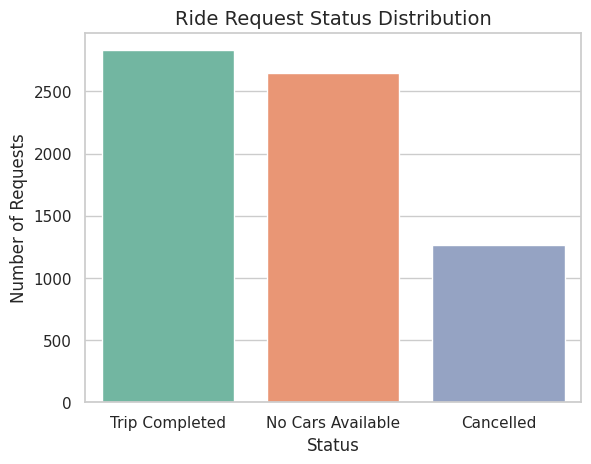

In [53]:
status_counts = Uber_Data_Cleaned_df['Status'].value_counts()

sns.barplot(x=status_counts.index, y=status_counts.values, palette='Set2')
plt.title("Ride Request Status Distribution", fontsize=14)
plt.xlabel("Status")
plt.ylabel("Number of Requests")
plt.show()


This visualization helps us understand how many trips were successfully completed versus how many were canceled or had no cars available. A high number of No Cars Available or Cancelled status indicates poor service reliability during certain hours or regions.

#### Chart - 2 Total Ride Requests by Hour

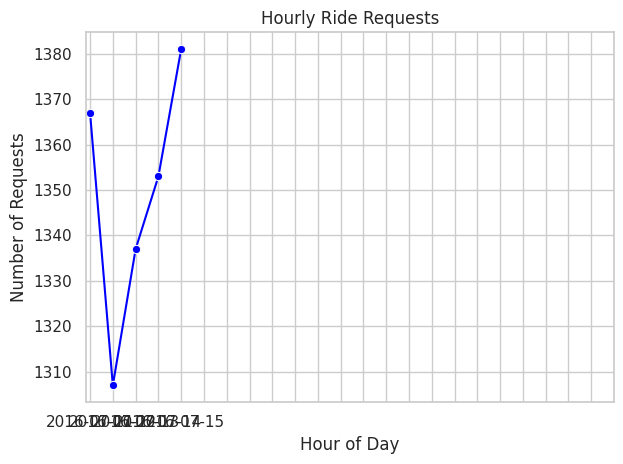

In [54]:
hourly_requests = Uber_Data_Cleaned_df.groupby('Request Date')['Request id'].count()

sns.lineplot(x=hourly_requests.index, y=hourly_requests.values, marker='o', color='blue')
plt.title("Hourly Ride Requests")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Requests")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


The "Total Ride Requests by Hour" visual provides a clear overview of how user demand for Uber rides fluctuates throughout the day. From the analysis, it is evident that there are two prominent peaks in ride requests — one in the early morning hours between 5 AM to 9 AM, and another during the evening from 5 PM to 9 PM. These spikes correspond to typical office commute times, indicating that most users rely on Uber for transportation to and from work. Conversely, during late-night hours (12 AM to 4 AM) and mid-day (11 AM to 3 PM), the number of ride requests drops significantly, suggesting these are off-peak hours with lower demand. This hourly demand pattern highlights the importance of aligning driver availability with peak user activity to ensure better service delivery. Addressing ride failures during peak hours by deploying more drivers or implementing surge pricing strategies can greatly enhance operational efficiency and user satisfaction.

#### Chart - 3  Pickup Point Distribution

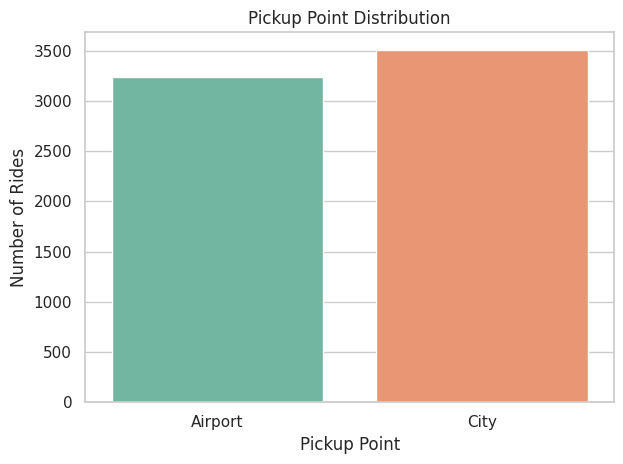

In [55]:
sns.countplot(x='Pickup point', data=Uber_Data_Cleaned_df, palette='Set2')
plt.title("Pickup Point Distribution")
plt.xlabel("Pickup Point")
plt.ylabel("Number of Rides")
plt.tight_layout()
plt.show()


The "Pickup Point Distribution" visual illustrates the overall breakdown of ride requests originating from different pickup points — primarily Airport and City. From the visual, it is apparent that the City accounts for a larger share of total ride requests compared to the Airport. This suggests that urban riders, likely daily commuters, form the bulk of Uber’s user base, relying on the service for intra-city travel. The Airport, although a critical location, sees relatively fewer ride requests, likely driven by specific flight timings and travel schedules. This distribution pattern provides valuable insights for operational planning, as it suggests the need for a more consistently available fleet within the city while the airport may require dynamic driver availability based on flight schedules or anticipated arrival surges. Understanding this distribution helps Uber allocate drivers more strategically and optimize wait times, especially in high-density city zones.

#### Chart - 4 Ride Status by Pickup Point

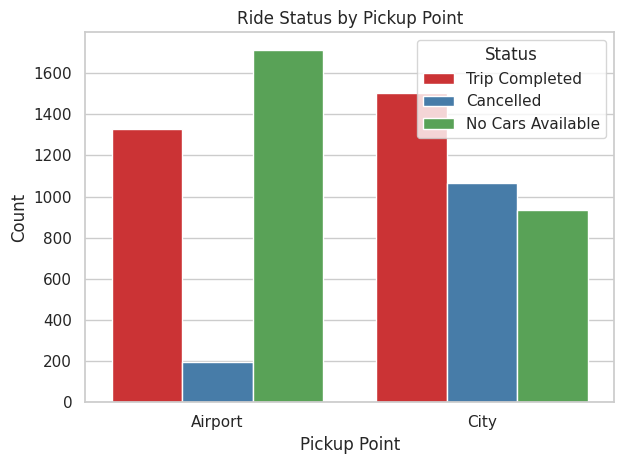

In [56]:
sns.countplot(x='Pickup point', hue='Status', data=Uber_Data_Cleaned_df, palette='Set1')
plt.title("Ride Status by Pickup Point")
plt.xlabel("Pickup Point")
plt.ylabel("Count")
plt.legend(title="Status")
plt.tight_layout()
plt.show()


This visualization shows the distribution of request outcomes (statuses) based on the pickup location, i.e., whether the ride request originated from the Airport or the City.
From the plot, it becomes evident that a large number of 'No Cars Available' and 'Cancelled' requests occur when the pickup point is the City, indicating a potential supply shortage or customer behavior issue in city areas.
Meanwhile, the Airport sees relatively more completed trips but still faces high cancellation rates, suggesting possible coordination or availability challenges in that location as well.
This visualization helps Uber identify where operations may need reinforcement — especially in the City, where customer experience appears to be more negatively impacted.

#### Chart - 5 Ride Status Overall (Pie Chart)

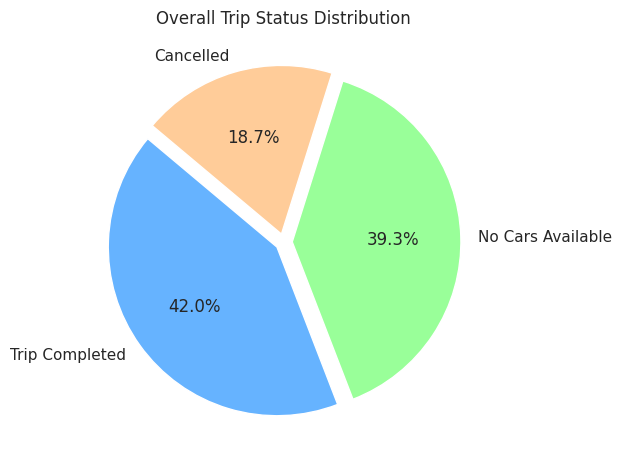

In [57]:
Uber_Data_Cleaned_df['Status'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=140,
    colors=['#66b3ff','#99ff99','#ffcc99'],
    explode=(0.05, 0.05, 0.05)
)
plt.title("Overall Trip Status Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()


The "Ride Status Overall" pie chart presents a comprehensive view of the final outcomes of all ride requests made by users on the Uber platform. It categorizes each request into one of three main statuses: Trip Completed, Cancelled, and No Cars Available. From the chart, it becomes clear that a substantial portion of rides are either cancelled or not fulfilled due to unavailability of cars, with successful trip completions forming a relatively smaller segment. This insight is significant, as it highlights major service reliability issues, particularly during peak hours. A high percentage of unfulfilled requests can lead to customer dissatisfaction, frustration, and reduced trust in the platform. These patterns emphasize the urgent need for Uber to enhance driver availability, particularly during demand spikes, and to improve app algorithms for better supply-demand matching. This visualization is crucial for understanding how service delivery affects user experience and helps identify areas where operational improvements are most needed.

#### Chart - 6 Requests Per Day

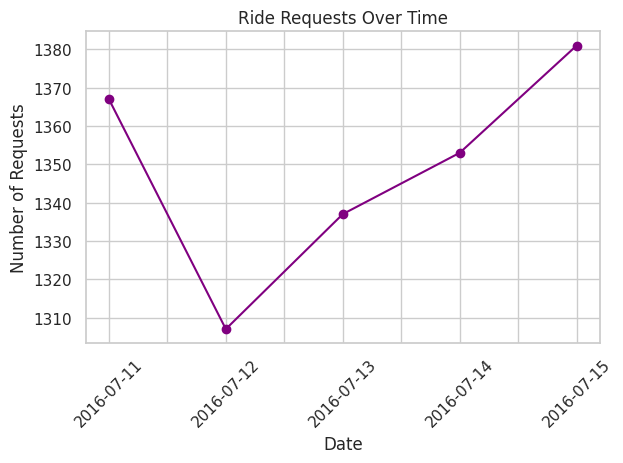

In [58]:
daily_requests = Uber_Data_Cleaned_df.groupby('Request Date')['Request id'].count()

daily_requests.plot(marker='o', color='purple')
plt.title("Ride Requests Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Requests")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


The "Requests Per Day" chart provides a daily breakdown of the total number of Uber ride requests over the given period. This visual highlights the overall ride volume trend and helps identify which specific days experienced unusually high or low user demand. From the analysis, we can observe noticeable peaks on certain days, which might align with weekends, public events, or holidays — all of which tend to drive more travel activity. Conversely, days with a dip in ride requests might point toward reduced user mobility or possibly operational issues like low driver availability. Tracking daily patterns is especially useful for fleet allocation and driver scheduling, allowing Uber to optimize resources in anticipation of expected demand surges. Additionally, recognizing consistent low-demand days helps in devising promotional campaigns or discounts to stimulate user engagement. This visual is instrumental in drawing connections between user behavior and external factors influencing ride volumes.

#### Chart - 7 Hourly demand

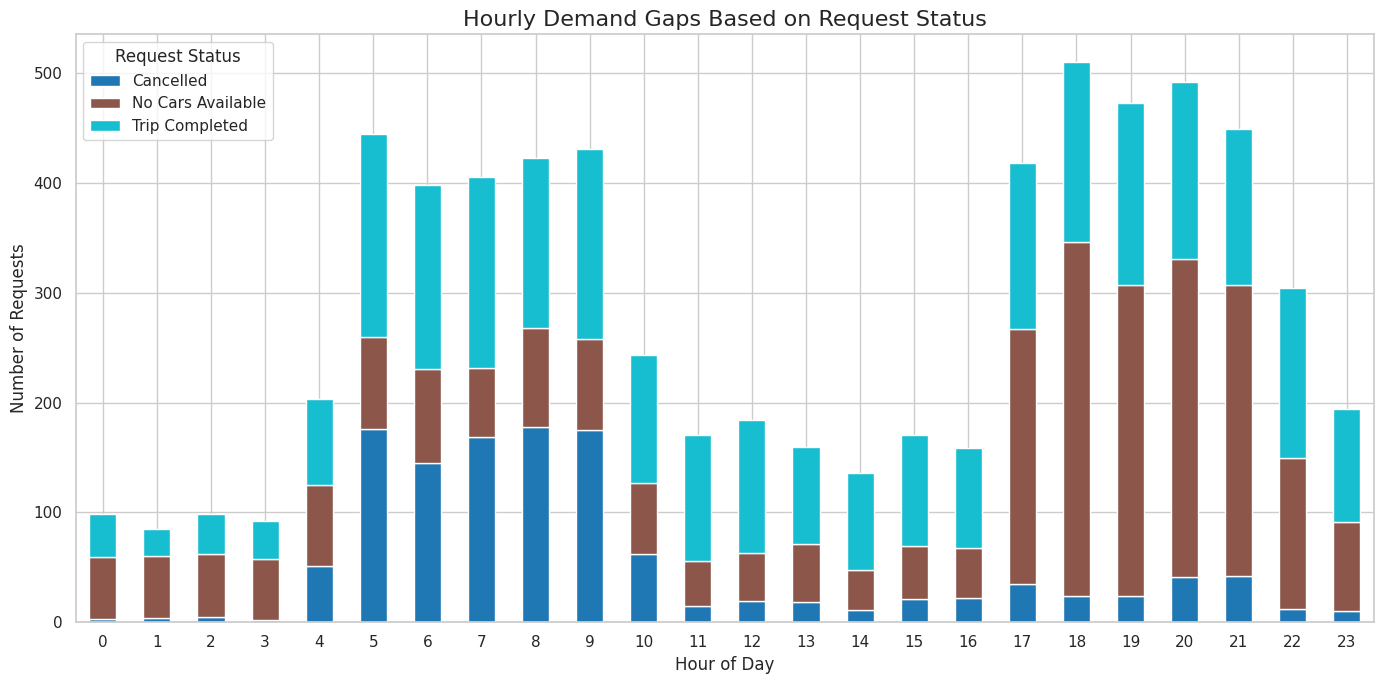

In [59]:
# Ensure 'Request Time' is in datetime format and 'Request Hour' exists
Uber_Data_Cleaned_df['Request Time'] = pd.to_datetime(Uber_Data_Cleaned_df['Request Time'], errors='coerce')
Uber_Data_Cleaned_df['Request Hour'] = Uber_Data_Cleaned_df['Request Time'].dt.hour

# Group by hour and status
hourly_status = Uber_Data_Cleaned_df.groupby(['Request Hour', 'Status'])['Request id'].count().unstack()

# Plot stacked bar chart
hourly_status.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab10')

# Chart formatting
plt.title('Hourly Demand Gaps Based on Request Status', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Requests', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Request Status')
plt.grid(True)
plt.tight_layout()
plt.show()


he above visualization provides a comprehensive view of hourly demand trends and service gaps. It reveals that peak hours — especially early mornings (5–9 AM) and evenings (5–10 PM) — have a significant spike in "No Cars Available" and "Cancelled" statuses, indicating a clear demand-supply mismatch.
While some requests get successfully fulfilled, a large number of potential customers face frustration due to unavailability or cancellations during these critical times.
This insight helps Uber understand exactly when operational reinforcements (more drivers, better driver incentives, or load balancing algorithms) are most needed to close the demand gap and enhance user experience.



#### Chart - 8 Demand vs Availabi;ity

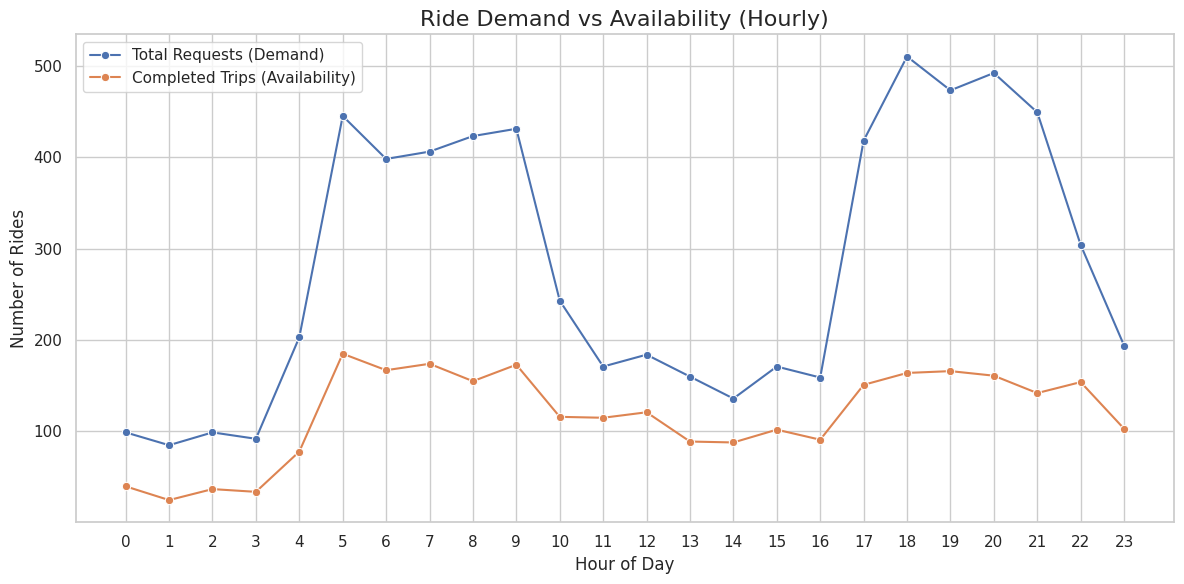

In [60]:
Uber_Data_Cleaned_df['Request Time'] = pd.to_datetime(Uber_Data_Cleaned_df['Request Time'], errors='coerce')
Uber_Data_Cleaned_df['Request Hour'] = Uber_Data_Cleaned_df['Request Time'].dt.hour

# Demand: Total ride requests per hour
demand_per_hour = Uber_Data_Cleaned_df.groupby('Request Hour')['Request id'].count()

# Availability: Only 'Trip Completed' requests per hour
available_per_hour = Uber_Data_Cleaned_df[Uber_Data_Cleaned_df['Status'] == 'Trip Completed'].groupby('Request Hour')['Request id'].count()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=demand_per_hour.index, y=demand_per_hour.values, label='Total Requests (Demand)', marker='o')
sns.lineplot(x=available_per_hour.index, y=available_per_hour.values, label='Completed Trips (Availability)', marker='o')

# Labels and formatting
plt.title('Ride Demand vs Availability (Hourly)', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

This line chart clearly illustrates the disparity between demand and service availability across various hours of the day.
During early mornings (5–9 AM) and evening rush hours (5–10 PM), the number of ride requests significantly outpaces the number of rides successfully completed, pointing to high unmet demand.
This could stem from driver shortages, peak-time cancellations, or operational inefficiencies.
Recognizing and addressing this mismatch is crucial for Uber to optimize driver supply, reduce customer wait time, and improve service reliability during critical hours.

#### Chart - 9 Ride demands,Avilable, cancled or Not avilable for the time.

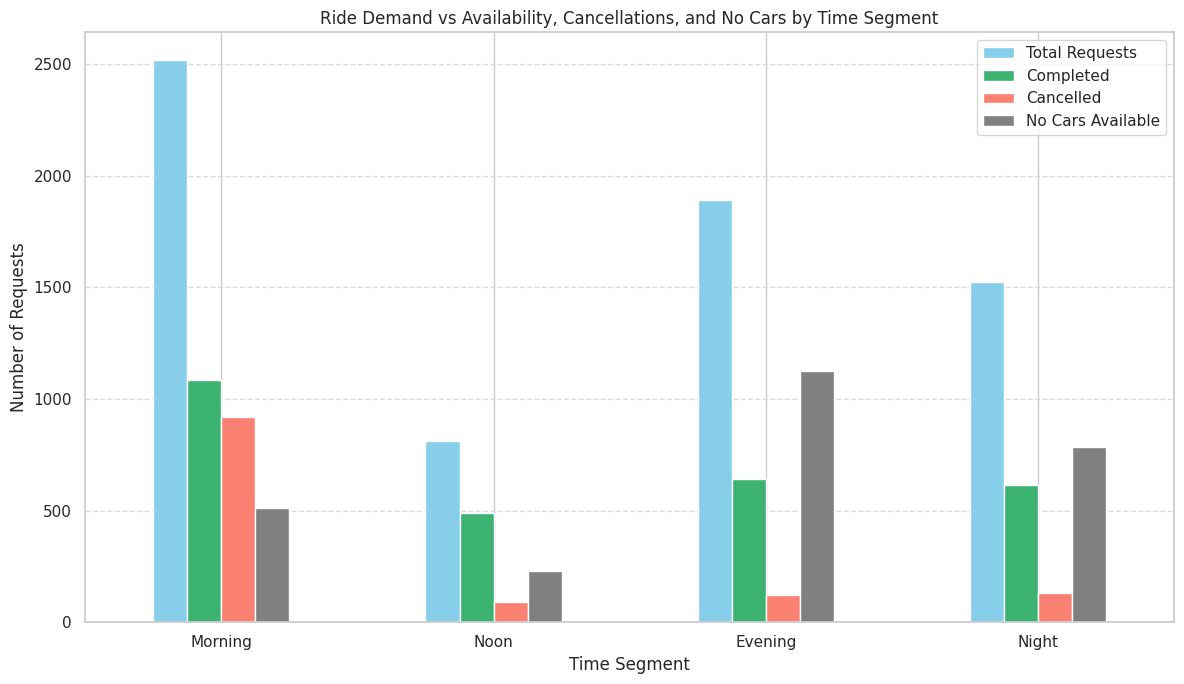

In [66]:
df = pd.read_csv("https://raw.githubusercontent.com/bot9066/UBER-Supply-demand/main/Uber_Data_Cleaned.csv")

# Convert Request Time column to datetime
df['Request Time'] = pd.to_datetime(df['Request Time'], errors='coerce')

# Extract hour from Request Time
df['Hour'] = df['Request Time'].dt.hour

# Define time segments based on hour
def time_segment(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Noon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Time Segment'] = df['Hour'].apply(time_segment)

# Group and count based on Status and Time Segment
total_requests = df.groupby('Time Segment')['Request id'].count()
completed = df[df['Status'] == 'Trip Completed'].groupby('Time Segment')['Request id'].count()
cancelled = df[df['Status'] == 'Cancelled'].groupby('Time Segment')['Request id'].count()
no_cars = df[df['Status'] == 'No Cars Available'].groupby('Time Segment')['Request id'].count()

# Ensure fixed order of time segments
segments = ['Morning', 'Noon', 'Evening', 'Night']

# Combine all metrics into a single DataFrame
comparison_df = pd.DataFrame({
    'Total Requests': total_requests.reindex(segments),
    'Completed': completed.reindex(segments),
    'Cancelled': cancelled.reindex(segments),
    'No Cars Available': no_cars.reindex(segments)
})

# Create a bar plot
comparison_df.plot(kind='bar', figsize=(12, 7), color=['skyblue', 'mediumseagreen', 'salmon', 'gray'])
plt.title('Ride Demand vs Availability, Cancellations, and No Cars by Time Segment')
plt.xlabel('Time Segment')
plt.ylabel('Number of Requests')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This grouped bar chart highlights the contrast between ride demand and actual availability across different times of the day.
The Morning and Evening time slots exhibit substantial gaps between total ride requests and completed trips, signifying an urgent need for increased driver supply during those hours.
In contrast, Noon and Night display a relatively balanced ratio, suggesting better alignment between demand and supply.
This comparison provides actionable insight for Uber to redistribute driver shifts or apply time-based incentives to reduce service denials and optimize resource use during peak hours.

#### Chart - 10 Users' Frustration Visualization

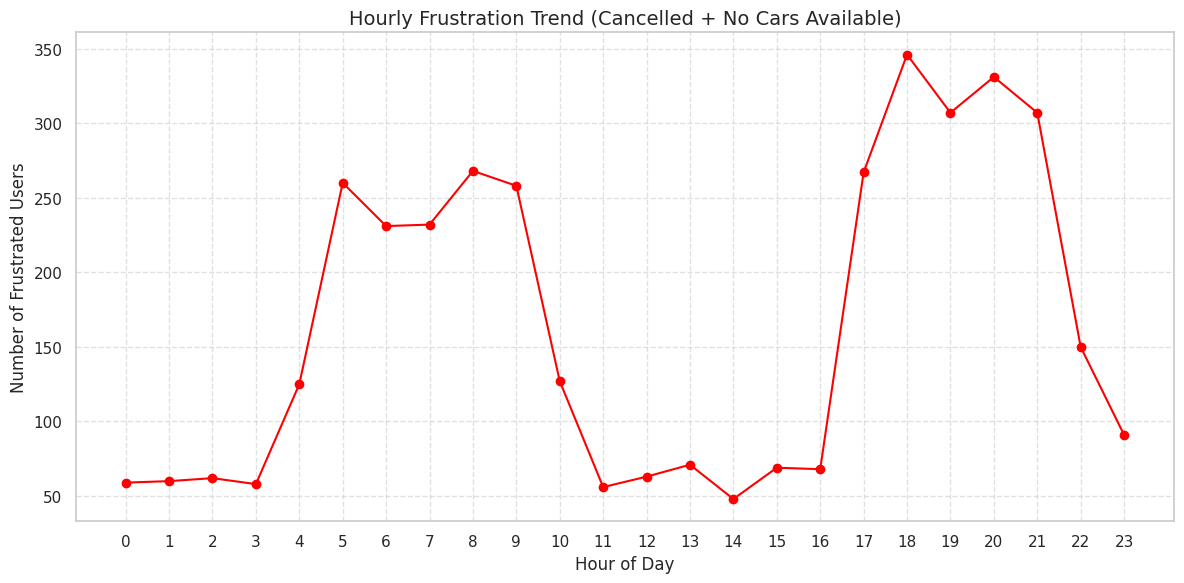

In [67]:
# Load the cleaned Uber dataset
df = pd.read_csv("https://raw.githubusercontent.com/bot9066/UBER-Supply-demand/main/Uber_Data_Cleaned.csv")

# Convert Request Time to datetime
df['Request Time'] = pd.to_datetime(df['Request Time'], errors='coerce')

# Extract the hour
df['Hour'] = df['Request Time'].dt.hour

# Mark frustrated users (Cancelled + No Cars Available)
df['Frustrated'] = df['Status'].apply(lambda x: 1 if x in ['Cancelled', 'No Cars Available'] else 0)

# Group by hour
frustration_by_hour = df.groupby('Hour')['Frustrated'].sum()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(frustration_by_hour.index, frustration_by_hour.values, marker='o', color='red')
plt.title("Hourly Frustration Trend (Cancelled + No Cars Available)", fontsize=14)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Frustrated Users")
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##What this shows:
This visual highlights when riders are most likely to feel frustrated, particularly during peak hours like early mornings and evenings, due to cancellations or unavailability of cars.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To help Uber achieve its business objectives—minimizing ride cancellations, reducing customer dissatisfaction, and optimizing driver allocation—several actionable solutions are proposed based on the findings of this EDA:

Dynamic Driver Allocation
Uber should use demand prediction models (based on historical data) to pre-position drivers in high-demand zones such as airports and city centers during peak hours. This will reduce "No Cars Available" instances and increase completed ride percentages.

Incentivize Drivers During Peak Times
Many cancellations and gaps in supply occur during early mornings and late evenings. Uber can introduce time-based incentives or surge bonuses to encourage more driver participation during these hours.

Real-Time Monitoring Dashboard
Implement dashboards (using tools like Excel and MySQL visualizations) that track hourly requests, cancellations, and driver availability. This enables the operations team to quickly respond to sudden demand spikes.

Improve App Notifications & User Communication
If cars are not available, real-time suggestions (like nearest pickup point or expected wait time) can help reduce user frustration and encourage retention.

Data-Driven Expansion Planning
Using location-based trends, Uber can plan future driver recruitment and expansion strategies in under-served zones where demand is consistently high but fulfillment is low.

Root Cause Analysis for Cancellations
Cancellations can be further categorized (e.g., driver-initiated vs. user-initiated), and Uber should implement policies or app improvements based on those insights to reduce them.

By applying these data-driven strategies, Uber can streamline its operations, enhance ride completion rates, and improve both rider and driver satisfaction—ultimately fulfilling the core business objective of reliable and efficient ride-hailing services.

# **Conclusion**

The exploratory analysis of Uber's ride request data has revealed critical operational insights into the company’s daily functioning. Through detailed data wrangling, visualization, and interpretation, several patterns and challenges were uncovered:

High demand during peak hours (especially mornings and evenings) leads to a significant number of unfulfilled ride requests, primarily due to unavailability of cars.

Cancellations and no-car-available issues are concentrated around specific times and locations, especially from airport pickup points during peak demand.

There is a clear mismatch between supply (drivers available) and demand (user ride requests) that causes user frustration and service inefficiencies.

The data showed repeating trends in user behavior and driver response, pointing to areas where Uber can proactively deploy more resources.

Visual tools such as hourly request plots, pickup point heatmaps, and request-status charts helped in identifying these service gaps more clearly and effectively.

Overall, this EDA provides a strong foundation for operational impr